## Exercise 1

We have $\mathbb{E}[X_i] = \alpha \beta$, $\mathbb{E}[X_i^2] = \mathbb{V}[X_i] + \mathbb{E}[X_i]^2 = \alpha \beta^2 + \alpha^2 \beta^2 = \alpha \beta^2 (1 + \alpha)$. Using the method of moments, we set
$$\begin{split}
\mathbb{E}[X_i] &= \alpha \beta = \overline{X}, \\
\mathbb{E}[X_i^2] &= \alpha \beta^2 (1 + \alpha) = \overline{X^2}. \\
\end{split}$$
Solving the system of equations gives us
$$\begin{split}
\hat{\alpha} &= \frac{\overline{X}^2}{\overline{X^2} - \overline{X}^2}, \\
\hat{\beta} &= \frac{\overline{X^2} - \overline{X}^2}{\overline{X}}. \\
\end{split}$$

## Exercise 2

(a) We have 
$$\begin{split}
\mathbb{E}[X_i] &= \frac{a + b}{2} \\
\mathbb{E}[X_i^2] &= \mathbb{V}[X_i] + \mathbb{E}[X_i]^2 = \frac{(b-a)^2}{12} + \frac{(a+b)^2}{4} = \frac{a^3 + b^2 + ab}{3}. \\
\end{split}$$

Solving the system yields
$$\begin{split}
\hat{a} &= \overline{X} - \sqrt{3(\overline{X^2} - \overline{X}^2)}, \\
\hat{b} &= \overline{X} + \sqrt{3(\overline{X^2} - \overline{X}^2)}. \\
\end{split}$$

(b) The density of $X_i$ is $f(x) = \frac{1}{b-a} \mathbb{1}_{[a,b]}(x)$, so the likelihood
$$\mathcal{L}(X_1, \dots, X_n) = \prod_{i=1}^n f(x) = \frac{1}{(b-a)^n} \mathbb{1}_{[a,b]}(\min(X_1, \dots, X_n)) \mathbb{1}_{[a,b]}(\max(X_1, \dots, X_n))$$
is maximised when
$$\begin{split}
\hat{a}_{MLE} &= \min(X_1, \dots, X_n), \\
\hat{b}_{MLE} &= \max(X_1, \dots, X_n). \\
\end{split}$$

(c) Since $\tau = \mathbb{E}[X_i] = \frac{a+b}{2}$, by equivariance of MLE (Theorem 9.14), we have
$$\hat{\tau} = \frac{\hat{a}_{MLE} + \hat{b}_{MLE}}{2}.$$

(d) The non-parametric plugin estimator of $\tau = \int x dF(x)$ is 
$$\tilde{\tau} = \frac{1}{n} \sum_{i=1}^n X_i = \overline{X}.$$
We have 
$$\mathbb{E}[\tilde{\tau}] = \mathbb{E}[X_i] = \frac{a+b}{2},$$
hence $\tilde{\tau}$ is unbiased. Also
$$\mathbb{V}[\tilde{\tau}] = \frac{\mathbb{V}[X_i]}{n} = \frac{(b-a)^2}{12n}.$$
Using the expression (6.7), we have
$$\text{MSE} = \frac{(b-a)^2}{12n.}.$$

In [1]:
import numpy as np
import scipy.stats as stats

In [2]:
rng = np.random.default_rng(12345)

In [3]:
a = 1
b = 3
n = 10

In [4]:
m = 1000

In [5]:
x = stats.uniform.rvs(size=(m, n), loc=a, scale=b - a, random_state=rng)

In [6]:
a_mle = np.min(x, axis=1)
b_mle = np.max(x, axis=1)

In [7]:
tau_mle = (a_mle + b_mle) / 2

MSE of $\hat{\tau}$:

In [8]:
np.mean((tau_mle - (b - a)) ** 2)

np.float64(0.015456295552161428)

MSE of $\tilde{\tau}$:

In [9]:
(b - a) ** 2 / 12 / n

0.03333333333333333

We can see that MLE produces a more efficient estimate.

## Exercise 3

(a) From Example 9.11, we have the MLE estimates for $\mu$ and $\sigma^2$:
$$\begin{split}
\hat{\mu} &= \overline{X}, \\
\hat{\sigma}^2 &= \overline{X^2} - \overline{X}^2. \\
\end{split}$$
The quantile $\tau = \mu + \sigma z_{0.05}$, so by Theorem 9.14 (equivariance of MLE),
$$\hat{\tau} = \hat{\mu} + \hat{\sigma} z_{0.05} = \overline{X} + z_{0.05} \sqrt{\overline{X^2} - \overline{X}^2}.$$

(b) We proceed based on Example 9.29 with $\tau = \mu + \sigma z_\alpha$. The Fisher information matrix is
$$I_n(\mu, \sigma) = \begin{pmatrix}
\frac{n}{\sigma^2} & 0 \\
0 & \frac{2n}{\sigma^2} \\
\end{pmatrix},$$
so
$$J_n(\mu, \sigma) = I_n^{-1}(\mu, \sigma) = \frac{1}{n} \begin{pmatrix}
\sigma^2 & 0 \\
0 & \frac{\sigma^2}{2} \\
\end{pmatrix}.$$
The gradient of $g$ is
$$\nabla g = \begin{pmatrix}
1 \\
z_{0.05} \\
\end{pmatrix},$$
therefore
$$\widehat{\text{se}}(\hat{\tau}) = \sqrt{(\widehat{\nabla g})^T \widehat{J}_n \widehat{\nabla g}} = \sqrt{\frac{\hat{\sigma}^2}{n} \left(1 + \frac{z_{0.05}}{2}\right)}$$
and the approximate confidence interval for $\tau$ by Theorem 9.19 is
$$\hat{\tau} \pm z_{\alpha / 2} \widehat{\text{se}}(\hat{\tau}) 
= \hat{\mu} + \hat{\sigma} z_{0.05} \pm z_{\alpha / 2} \sqrt{\frac{\hat{\sigma}^2}{n} \left(1 + \frac{z_{0.05}}{2}\right)}.$$

In [10]:
x = np.array([
    3.23, -2.50,  1.88, -0.68,  4.43, 0.17,
    1.03, -0.07, -0.01,  0.76,  1.76, 3.18,
    0.33, -0.31,  0.30, -0.61,  1.52, 5.43,
    1.54,  2.28,  0.42,  2.33, -1.03, 4.00,
    0.39,
])

In [11]:
mu_mle = np.mean(x)
sigma_mle = np.sqrt(np.mean(x ** 2) - mu_mle ** 2)

The MLE $\hat{\tau}$:

In [12]:
tau_mle = mu_mle + stats.norm.ppf(0.95) * sigma_mle
tau_mle

np.float64(4.180410658803283)

The standard error:

In [13]:
sigma_mle * np.sqrt((1 + stats.norm.ppf(0.95)) / x.shape[0])

np.float64(0.5911779036243616)

Using the parametric bootstrap:

In [14]:
m = 1000

In [15]:
y = stats.norm.rvs(size=(m, x.shape[0]), loc=mu_mle, scale=sigma_mle, random_state=rng)

In [16]:
mu_star = np.mean(y, axis=1)
sigma_star = np.std(y, axis=1)
tau_star = mu_star + sigma_star * stats.norm.ppf(0.95)

The bootstrap standard error is:

In [17]:
np.std(tau_star)

np.float64(0.5446103266099905)

## Exercise 4

From Example 9.12, the MLE estimator of $\theta$ is $\max(X_1, \dots, X_n)$.

Building on the results of Exercise 7 in Chapter 8 and Exercise 3 in Chapter 3, we have for $Y_n = \max(X_1, \dots, X_n)$:
$$f(y) = \begin{cases}
\frac{n}{\theta} \left(\frac{y}{\theta}\right)^{n-1}, &\text{ if } y \in [0, \theta] \\
0, &\text{otherwise}
\end{cases}$$

For $\varepsilon \in (0, \theta)$,
$$\mathbb{P}[Y < \theta - \varepsilon] = \int_0^{\theta - \varepsilon} f(y) dy = \left(1 - \frac{\varepsilon}{\theta}\right)^n \to 0$$
as $n \to \infty$. If $\varepsilon > \theta$, then $\mathbb{P}[Y < \theta - \varepsilon] = 0$. Thus, by definition $Y \xrightarrow{P} \theta$, and so the MLE estimator is consistent.

## Exercise 5

For the method of moments, we have $\mathbb{E}[X_i] = \lambda$, so setting $\mathbb{E}[X_i] = \overline{X}$ gives us $\hat{\lambda} = \overline{X}$.

If $X_i \sim \text{Poisson}(\lambda)$, then
$$f(x) = e^{-\lambda}\frac{\lambda^x}{x!},$$
so the likelihood is
$$\mathcal{L}(X_1, \dots, X_n) = \prod_{i=1}^n f(X_i) = e^{-\lambda n} \lambda^{\sum_{i=1}^n X_i} \left(\prod_{i=1}^n X_i!\right)^{-1},$$
and the log-likelihood
$$\log \mathcal{L}(X_1, \dots, X_n) = -\lambda n + \sum_{i=1}^n X_i \log \lambda - \sum_{i=1}^n \log X_i!.$$
Thus
$$\frac{\partial \log \mathcal{L}}{\partial \lambda} = -n + \frac{1}{\lambda} \sum_{i=1}^n X_i,$$
from which
$$\hat{\lambda} = \overline{X}.$$
Further,
$$\frac{\partial^2 \log \mathcal{L}}{\partial \lambda^2} = -\frac{n \overline{X}}{\lambda^2},$$
so
$$I_n(\lambda) = \mathbb{E}\left[-\frac{\partial^2 \log \mathcal{L}}{\partial \lambda^2}\right] = \frac{n \mathbb{E}[\overline{X}]}{\lambda^2} = \frac{n}{\lambda}$$
and
$$I(\lambda) = \frac{I_n(\lambda)}{n} = \frac{1}{\lambda}.$$

## Exercise 6

(a) We have
$$\psi = \mathbb{P}(Y_1=1) = \mathbb{P}(X_1 > 0) = 1 - \mathbb{P}(X_1 \leq 0) = 1 - \Phi(-\theta).$$
From Example 9.11, $\hat{\theta} = \overline{X}$, thus by Theorem 9.14 (equivariance of MLE), 
$$\hat{\psi} = 1 - \Phi\left(-\overline{X}\right).$$

(b) From Example 9.21, we have $\widehat{\text{se}}(\hat{\theta}) = \frac{1}{\sqrt{n}}$, since the variance of $X_1$ is 1.

Using Theorem 9.24 (The Delta Method) with $g(\theta) = 1 - \Phi(-\theta)$ and $g'(\theta) = f(-\theta)$, we have
$$\widehat{\text{se}}(\widehat{\psi}) = f(-\hat{\theta})\; \widehat{\text{se}}(\hat{\theta}) = \frac{f(-\hat{\theta})}{\sqrt{n}}.$$

The approximate 95% confidence interval is then
$$(\widehat{\psi} - 2 \widehat{\text{se}}(\widehat{\psi}), \widehat{\psi} + 2 \widehat{\text{se}}(\widehat{\psi})).$$

(c) We can view $Y_i$ as Bernoulli random variables with parameter $\psi = 1 - \Phi(-\theta)$. Then
$$\mathbb{E}[\tilde{\psi}] = \psi$$
and
$$\mathbb{V}[\tilde{\psi}] = \frac{\mathbb{V}[Y_i]}{n} = \frac{\psi (1 - \psi)}{n} \to 0$$
as $n \to 0$, thus $\tilde{\psi}$ converges in quadratic mean ot $\psi$. By theorem 5.4(a), $\tilde{\psi} \xrightarrow{P} \psi$, so $\tilde{\psi}$ is consistent.

(d) From (b), we have that the asymptotic variance of $\widehat{\psi}$ is 
$$\frac{f(-\hat{\theta})^2}{n},$$
The asymptotice relative efficiency of $\tilde{\psi}$ to $\widehat{\psi}$ is
$$\frac{f(-\hat{\theta})^2}{\psi (1 - \psi)}.$$

(e) By the law of large numbers (Theorem 5.6), we have $\overline{X} \xrightarrow{P} \mathbb{E}[X]$. Then by Theorem 5.5(f), we get
$$\widehat{\psi} \xrightarrow{P} 1 - \Phi(-\mathbb{E}[X]),$$
whereas
$$\phi = 1 - F_X(0).$$
In general, we cannot expect $F_X(0) = \Phi(-\mathbb{E}[X])$ for an arbitrary distribution of $X$, hence the estimator $\widehat{\psi}$ is no longer consistent.

## Exercise 7

(a) The likelihood is given by
$$\mathcal{L}(X_1, X_2) = {n_1 \choose X_1} p_1^{X_1} (1-p_1)^{n_1 - X_1} {n_2 \choose X_2} p_2^{X_2} (1-p_2)^{n_2 - X_2},$$
so
$$\log \mathcal{L}(X_1, X_2) = X_1 \log p_1 + (n_1 - X_1) \log (1-p_1) + X_2 \log p_2 + (n_2 - X_2) \log (1-p_2) + \log {n_1 \choose X_1} + \log {n_2 \choose X_2}.$$
Then
$$\begin{split}
\frac{\partial}{\partial p_1} \log \mathcal{L}(X_1, X_2) &= \frac{X_1}{p_1} - \frac{n_1 - X_1}{1 - p_1} \\
\frac{\partial}{\partial p_2} \log \mathcal{L}(X_1, X_2) &= \frac{X_2}{p_2} - \frac{n_2 - X_2}{1 - p_2} \\
\frac{\partial^2}{\partial p_1^2} \log \mathcal{L}(X_1, X_2) &= -\frac{X_1}{p_1^2} - \frac{n_1 - X_1}{(1 - p_1)^2} \\
\frac{\partial^2}{\partial p_2^2} \log \mathcal{L}(X_1, X_2) &= -\frac{X_2}{p_2^2} - \frac{n_2 - X_2}{(1 - p_2)^2} \\
\frac{\partial^2}{\partial p_1 \partial p_2} \log \mathcal{L}(X_1, X_2) &= 0 \\
\end{split}$$
Setting $\frac{\partial}{\partial p_1} \log \mathcal{L}(X_1, X_2) = 0$ and $\frac{\partial}{\partial p_2} \log \mathcal{L}(X_1, X_2) = 0$, we obtain 
$$\begin{split}
\widehat{p}_1 &= \frac{X_1}{n_1}, \\
\widehat{p}_1 &= \frac{X_2}{n_2}. \\
\end{split}$$

(b) The expectations are
$$\begin{split}
\mathbb{E}\left[-\frac{\partial^2}{\partial p_1^2} \log \mathcal{L}(X_1, X_2)\right] &= \frac{\mathbb{E}[X_1]}{p_1^2} + \frac{n_1 - \mathbb{E}[X_1]}{(1 - p_1)^2} = \frac{n_1}{p_1} + \frac{n_1}{1 - p_1} = \frac{n_1}{p_1 (1 - p_1)}, \\
\mathbb{E}\left[-\frac{\partial^2}{\partial p_2^2} \log \mathcal{L}(X_1, X_2)\right] &= \frac{\mathbb{E}[X_2]}{p_2^2} + \frac{n_2 - \mathbb{E}[X_2]}{(1 - p_2)^2} = \frac{n_2}{p_2} + \frac{n_2}{1 - p_2} = \frac{n_2}{p_2 (1 - p_2)}, \\
\mathbb{E}\left[-\frac{\partial^2}{\partial p_1 \partial p_2} \log \mathcal{L}(X_1, X_2)\right] &= 0, \\
\end{split}$$
so the Fisher information matrix is given by
$$I(p_1, p_2) = \begin{pmatrix}
\frac{n_1}{p_1 (1 - p_1)} & 0 \\
0 & \frac{n_2}{p_2 (1 - p_2)} \\
\end{pmatrix}.$$

(c) Inverting the Fisher information matrix obtained above, we get
$$J = I(p_1, p_2)^{-1} = \begin{pmatrix}
\frac{p_1 (1 - p_1)}{n_1} & 0 \\
0 & \frac{p_2 (1 - p_2)}{n_2} \\
\end{pmatrix}.$$

For $\psi = p_1 - p_2$, we have
$$\nabla \psi = \begin{pmatrix}
1 \\
-1 \\
\end{pmatrix}.$$

Then by Theorem 9.28 (Multiparameter delta method), we obtain
$$\widehat{\text{se}}(\widehat{\psi})^2 
= (\widehat{\nabla \psi})^T \widehat{J} (\widehat{\nabla \psi})
= \frac{\hat{p}_1 (1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2 (1 - \hat{p}_2)}{n_2}
= \frac{X_1 (n_1 - X_1)}{n_1^3} + \frac{X_2 (n_2 - X_2)}{n_2^3}.
$$

(d)

In [18]:
n1 = 200
n2 = 200
X1 = 160
X2 = 148

In [19]:
alpha = 0.1

The estimator $\hat{\psi}$:

In [20]:
p1_mle = X1 / n1
p2_mle = X2 / n2
psi_mle = p1_mle - p2_mle
psi_mle

0.06000000000000005

The 90% confidence interval using the delta method:

In [21]:
se = np.sqrt(X1 * (n1 - X1) / n1 ** 3 + X2 * (n2 - X2) / n2 ** 3)
psi_mle + stats.norm.ppf([alpha / 2, 1 - alpha / 2]) * se

array([-0.00904468,  0.12904468])

The 90% confidence interval using the parametric bootstrap:

In [22]:
m = 1000

In [23]:
x1 = stats.binom.rvs(size=m, n=n1, p=p1_mle, random_state=rng)
x2 = stats.binom.rvs(size=m, n=n2, p=p2_mle, random_state=rng)

In [24]:
2 * psi_mle - np.quantile(x1 / n1 - x2 / n2, q=[1 - alpha / 2, alpha / 2])

array([-0.01 ,  0.125])

## Exercise 8

The likelihood is given by
$$\mathcal{L}(X_1, \dots, X_n) 
= \prod_{i=1}^n \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(X_i - \mu)^2}{2\sigma^2}}
= (2\pi)^{-\frac{n}{2}} \sigma^{-n} \exp\left\{-\frac{1}{2\sigma^2} \sum_{i=1}^n (X_i - \mu)^2\right\},$$
so
$$\log \mathcal{L}(X_1, \dots, X_n) 
= -\frac{n}{2} \log (2\pi) -n \log \sigma -\frac{1}{2\sigma^2} \sum_{i=1}^n (X_i - \mu)^2.$$
Then
$$\begin{split}
\frac{\partial}{\partial \mu} \log \mathcal{L}(X_1, \dots, X_n) &= \frac{1}{\sigma^2} \sum_{i=1}^n (X_1 - \mu) \\
\frac{\partial}{\partial \sigma} \log \mathcal{L}(X_1, \dots, X_n) &= -\frac{n}{\sigma} + \frac{1}{\sigma^3} \sum_{i=1}^n (X_1 - \mu)^2 \\
\frac{\partial^2}{\partial \mu^2} \log \mathcal{L}(X_1, \dots, X_n) &= -\frac{n}{\sigma_2} \\
\frac{\partial^2}{\partial \sigma^2} \log \mathcal{L}(X_1, \dots, X_n) &= \frac{n}{\sigma^2} - \frac{3}{\sigma^4} \sum_{i=1}^n (X_1 - \mu)^2 \\
\frac{\partial^2}{\partial p_1 \partial p_2} \log \mathcal{L}(X_1, \dots, X_n) &= -\frac{2}{\sigma^3} \sum_{i=1}^n (X_1 - \mu)\\
\end{split}$$
and
$$\begin{split}
\mathbb{E}\left[-\frac{\partial^2}{\partial \mu^2} \log \mathcal{L}(X_1, \dots, X_n)\right] &= \frac{n}{\sigma_2} \\
\mathbb{E}\left[-\frac{\partial^2}{\partial \sigma^2} \log \mathcal{L}(X_1, \dots, X_n)\right] 
&= -\frac{n}{\sigma^2} + \frac{3}{\sigma^4} \sum_{i=1}^n \mathbb{E}[(X_1 - \mu)^2]
= -\frac{n}{\sigma^2} + \frac{3}{\sigma^4} n\sigma^2
= \frac{2n}{\sigma^2} \\
\mathbb{E}\left[-\frac{\partial^2}{\partial p_1 \partial p_2} \log \mathcal{L}(X_1, \dots, X_n)\right] &= \frac{2}{\sigma^3} \sum_{i=1}^n \mathbb{E}[X_1 - \mu] = 0\\
\end{split}$$
Therefore, the Fisher information matrix is given by
$$I_n(\mu, \sigma) = \begin{pmatrix}
\frac{n}{\sigma_2} & 0 \\
0 & \frac{2n}{\sigma^2} \\
\end{pmatrix}.$$

## Exercise 9

(a) Following Example 9.21, we have
$$\widehat{\text{se}}(\widehat{\mu}) = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{n}}.$$
Then by Theorem 9.21 (The Delta Method) with $g(x) = e^x$, we have
$$\widehat{\text{se}}(\widehat{\theta}) = e^{\widehat{\mu}} \widehat{\text{se}}(\widehat{\mu}) = \frac{e^{\overline{X}}}{\sqrt{n}}.$$

In [25]:
mu = 5
sigma = 1
n = 100

In [26]:
alpha = 0.05

In [27]:
x = stats.norm.rvs(size=n, loc=mu, scale=sigma, random_state=rng)

In [28]:
theta_mle = np.exp(np.mean(x))
theta_mle

np.float64(159.50924633813153)

The 95% confidence interval using the delta method:

In [29]:
se_theta = np.exp(np.mean(x)) / np.sqrt(n)
theta_mle + stats.norm.ppf([alpha / 2, 1 - alpha / 2]) * se_theta

array([128.24600854, 190.77248414])

Using parametric bootstrap:

In [30]:
x_star = stats.norm.rvs(size=(m, n), loc=np.mean(x), scale=sigma, random_state=rng)
theta_star = np.exp(np.mean(x_star, axis=1))
theta_mle + stats.norm.ppf([alpha / 2, 1 - alpha / 2]) * np.std(theta_star)

array([128.46309869, 190.55539399])

Using non-parametric bootstrap:

In [31]:
theta_star2 = stats.bootstrap((x,), lambda x: np.exp(np.mean(x)), n_resamples=m, random_state=rng).bootstrap_distribution
2 * theta_mle - np.quantile(theta_star2, q=[1 - alpha / 2, alpha / 2])

array([123.44854827, 188.07992447])

The three intervals are consistent.

(b)

In [32]:
import matplotlib.pyplot as plt

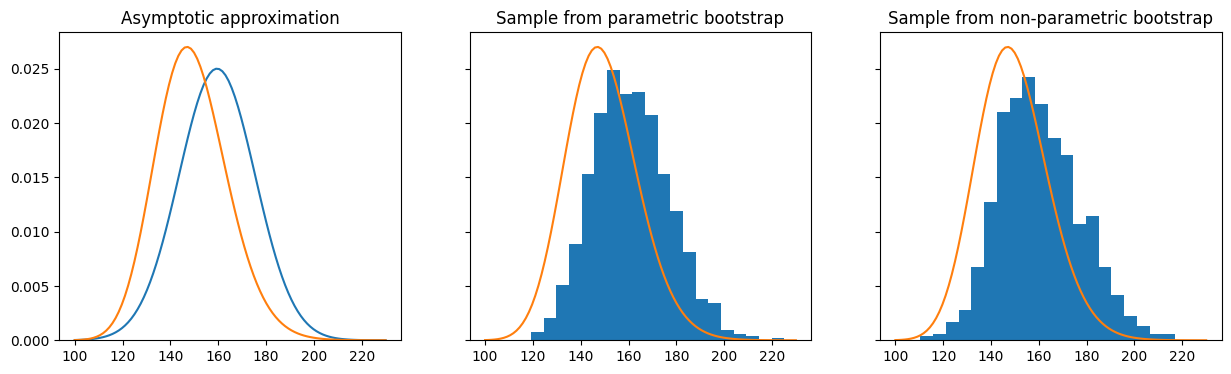

In [33]:
xs = np.linspace(100, 230, 100)

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True);

axs[0].plot(xs, stats.norm.pdf(xs, loc=theta_mle, scale=se_theta), label='Approximation');
axs[0].plot(xs, stats.lognorm.pdf(xs, s=1 / np.sqrt(n), scale=np.exp(mu)), label='Sampling distribution');
axs[0].set_title('Asymptotic approximation');
#axs[0].legend();

axs[1].hist(theta_star, bins=20, density=True, label='Bootstrap sample');
axs[1].plot(xs, stats.lognorm.pdf(xs, s=1 / np.sqrt(n), scale=np.exp(mu)), label='Sampling distribution');
axs[1].set_title('Sample from parametric bootstrap');
#axs[1].legend();

axs[2].hist(theta_star2, density=True, bins=20);
axs[2].plot(xs, stats.lognorm.pdf(xs, s=1 / np.sqrt(n), scale=np.exp(mu)), label='Sampling distribution');
axs[2].set_title('Sample from non-parametric bootstrap');

We can see that all three approached provide similar approximations of the true sampling distribution.

## Exercise 10

(a) Using the results of Exercise 4, we have for $Y_n = \max(X_1, \dots, X_n)$
$$f(x) = \begin{cases}
\frac{n}{\theta} \left(\frac{x}{\theta}\right)^{n-1}, &\text{ if } x \in [0, \theta] \\
0, &\text{otherwise}
\end{cases}$$

In [35]:
theta = 1
n = 50
m = 1000

In [38]:
x = stats.uniform.rvs(size=n, loc=0, scale=theta, random_state=rng)

In [39]:
theta_hat = np.max(x)
theta_hat

np.float64(0.9860261691306146)

Sample from the parametric bootstrap:

In [41]:
x_star_param = stats.uniform.rvs(size=(m, n), loc=0, scale=theta_hat, random_state=rng)
theta_star_param = np.max(x_star_param, axis=1)

Sample from non-parametric bootstrap:

In [46]:
theta_star_nonparam = stats.bootstrap((x,), lambda x: np.max(x), n_resamples=m, random_state=rng).bootstrap_distribution

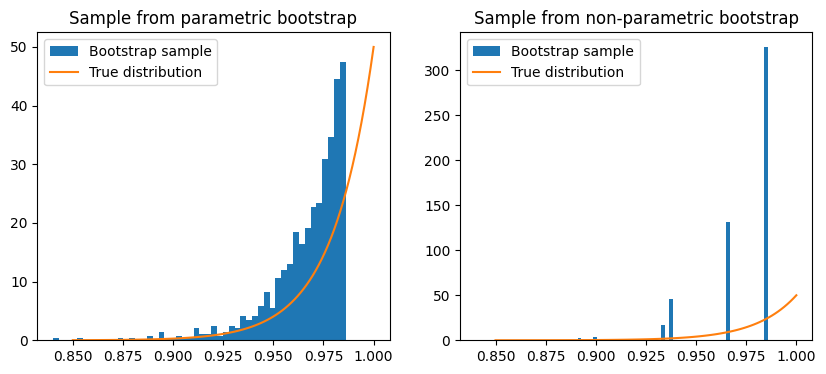

In [48]:
xs = np.linspace(0.85, 1., 100)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

axs[0].hist(theta_star_param, bins=50, density=True, label='Bootstrap sample');
axs[0].plot(xs, n / theta * (xs / theta) ** (n - 1), label='True distribution');
axs[0].set_title('Sample from parametric bootstrap');
axs[0].legend();

axs[1].hist(theta_star_nonparam, bins=50, density=True, label='Bootstrap sample');
axs[1].plot(xs, n / theta * (xs / theta) ** (n - 1), label='True distribution');
axs[1].set_title('Sample from non-parametric bootstrap');
axs[1].legend();

(b) We showed in Exercise 7 in Chapter 8 that $\mathbb{P}(\hat{\theta}^* = \hat{\theta}) \approx 0.632$. In the parametric bootstrap, $\hat{\theta}^*$ has a continuous distribution with density
$$f(\hat{\theta}^*) = \begin{cases}
\frac{n}{\hat{\theta}} \left(\frac{\hat{\theta}^*}{\hat{\theta}}\right)^{n-1}, &\text{ if } \hat{\theta}^* \in [0, \hat{\theta}] \\
0, &\text{otherwise}
\end{cases}$$
so $\mathbb{P}(\hat{\theta}^* = \hat{\theta}) = 0$.